In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine!
Combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
# print(Combined_df)
Combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
Combined_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Combined_df[Combined_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Combined_df[Combined_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df = Combined_df[Combined_df['Mouse ID'] != 'g989']
Clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
Clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Groupby and Describe
Tumor_summary_statistics = Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
#Cut down unnecesarry columns and add more
Pareddown_df = Tumor_summary_statistics.drop(['max', 'count', 'min', '25%', '75%'], axis=1)
Pareddown_df['Variance'] = Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Pareddown_df['SEM'] = Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#Make it look a little nicer and Rename columns.
Renamed_stat_df = Pareddown_df.rename(columns={'mean':'Mean','50%':'Median', 'std':'STD'})
Renamed_stat_df

,Mean,STD,Median,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
grp_tumor = Clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
grp_tumor.agg(['mean','std','median','var','sem'])

,mean,std,median,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

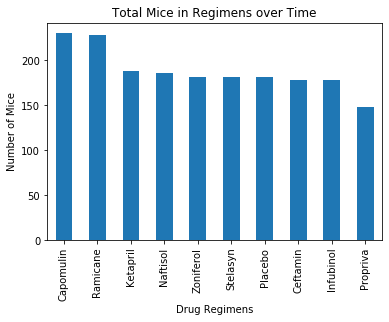

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# clean_df.groupby('Drug Regimen').sum()
Bar_Plot =Clean_df['Drug Regimen'].value_counts().plot(kind ='bar')
Bar_Plot.set_title('Total Mice in Regimens over Time')
Bar_Plot.set_xlabel('Drug Regimens')
Bar_Plot.set_ylabel('Number of Mice')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

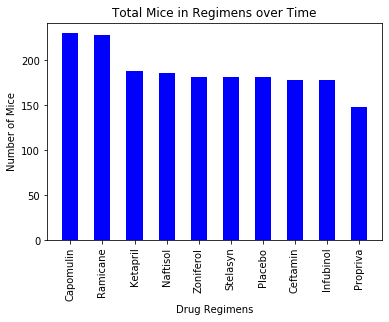

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bary_axis = Clean_df['Drug Regimen'].value_counts()
barx_axis = bary_axis.index
plt.bar(barx_axis, bary_axis, color = 'b', width= .5)
plt.title("Total Mice in Regimens over Time")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.xticks(rotation='vertical')

Text(0, 0.5, '')

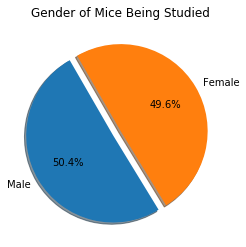

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Dedup_df = Clean_df.drop_duplicates(['Mouse ID'])
Pie_plot = Dedup_df['Sex'].value_counts().plot(kind ='pie', shadow = True, startangle=120, autopct='%1.1f%%', explode = (.1,0))
Pie_plot.set_title('Gender of Mice Being Studied')
Pie_plot.set_ylabel('')

C:\Users\zachg\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


Text(0.5, 1.0, 'Gender of Mice Being Studied')

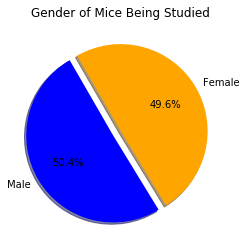

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Genders = ['Male', 'Female']
Gendercount = [Dedup_df['Sex'].value_counts()]
Colorspie = ['Blue', 'Orange']
plt.pie(Gendercount, labels = Genders, colors = Colorspie, autopct="%1.1f%%", shadow=True, startangle=120, explode= (.1,0))
plt.title('Gender of Mice Being Studied')